In [1]:
import numpy as np 
import pandas as pd
import os, sys
from time import time
from scipy import ndimage

#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers, callbacks
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Convolution2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
FileName = r"C:\Users\sidda\Desktop\plots\Figure13model\mapped_data\AllRunsmapped.csv"
df = pd.read_csv(FileName)
print(df.shape)
df.head()

(2569, 8)


,Address,Element,FileName,Recovery,Run,SheetName,Sl_No,Stage
0,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 06m 48.7750s.jpg,7.548923,1,R1_Lead,2,1
1,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 06m 58.5150s.jpg,8.758845,1,R1_Lead,3,1
2,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 07m 10.1370s.jpg,9.605029,1,R1_Lead,4,1
3,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 07m 20.7539s.jpg,10.123912,1,R1_Lead,5,1
4,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Lead,Cell1 19h 07m 32.409s.jpg,10.577631,1,R1_Lead,6,1


In [3]:
df = df[df.Element == 'Zinc']
print(df.shape)
df.head()

(1547, 8)


,Address,Element,FileName,Recovery,Run,SheetName,Sl_No,Stage
43,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Zinc,Cell1 19h 31m 12.6240s.jpg,9.481437,1,R1_Zinc,57,2
44,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Zinc,Cell1 19h 31m 22.7880s.jpg,11.687719,1,R1_Zinc,58,2
45,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Zinc,Cell1 19h 31m 32.9070s.jpg,14.963232,1,R1_Zinc,59,2
46,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Zinc,Cell1 19h 31m 46.1760s.jpg,16.307366,1,R1_Zinc,60,2
47,C:\Users\sidda\Desktop\plots\Figure13model\Cle...,Zinc,Cell1 19h 31m 57.2850s.jpg,17.622741,1,R1_Zinc,61,2


In [4]:
#Setting and Cropping image files
   #Set Image crop dimensions- Set it to 128 * 128
left=115
top=35
right=243
bottom=163

train_files = []
y_train = []
dataset = []
for index, row in df.iterrows():
    y_train.append(row['Recovery']) 
    img = load_img(row['Address'])  # this is a PIL image
    
    img1 = img.crop((left,top,right,bottom))
    
    #img2 =img1.thumbnail((128, 128))
    x = img_to_array(img1)
    #x = x.reshape((1, 128, 128))
    #x = (x - 128.0) / 128.0
    x = (x - 255.0) / 255.0
    dataset.append(x)


In [6]:
from sklearn.model_selection import train_test_split

# Setting ratios of Training,validation and testing
test_to_train=0.4
val_to_test=0.5


#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=test_to_train, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=val_to_test, random_state=33)
print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))

Train set size: 928, Val set size: 310, Test set size: 309


In [2]:
# CNN Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 96)        5

In [11]:
model.compile(loss=rmse, optimizer='rmsprop', metrics=['mae'])

In [12]:
len(X_train)

928

In [15]:
#Incase of TensorFlow version 2
X_train=np.array(X_train)
y_train=np.array(y_train)

X_val=np.array(X_val)
y_val=np.array(y_val)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [16]:
#model.fit([X_train], y_train, batch_size = 32, epochs = 15)

my_callbacks = EarlyStopping(monitor="loss", patience=6, mode="auto")

#hist= model.fit([X_train], y_train, batch_size=32,
                   # epochs=5, 
                 # validation_data=([X_val], y_val))

hist = model.fit([X_train], y_train, batch_size=32, epochs=3, verbose=1, validation_data=([X_val], y_val), callbacks=[my_callbacks])


Epoch 1/3
29/29 [==============================] - 19s 650ms/step - loss: 14.4558 - mae: 12.3909 - val_loss: 29.2153 - val_mae: 28.5385
Epoch 2/3
29/29 [==============================] - 19s 640ms/step - loss: 10.9704 - mae: 8.9897 - val_loss: 28.9401 - val_mae: 28.2546
Epoch 3/3
29/29 [==============================] - 19s 642ms/step - loss: 10.2968 - mae: 8.4108 - val_loss: 25.7864 - val_mae: 24.9929


In [17]:
predictions_test = model.predict([X_test])

In [18]:
#Finding the R-squared values of Regression
from sklearn.metrics import r2_score
Rsquared_testset=r2_score(y_test, predictions_test)
print(Rsquared_testset)

-18.636769564364666


In [19]:
#Training and Validation Rsquared
predictions_train= model.predict([X_train])
predictions_val=model.predict([X_val])
Rsquared_trainset=r2_score(y_train, predictions_train)
Rsquared_valset=r2_score(y_val, predictions_val)
print(Rsquared_trainset)
print(Rsquared_valset)

-16.437665105857388
-15.767464120315498


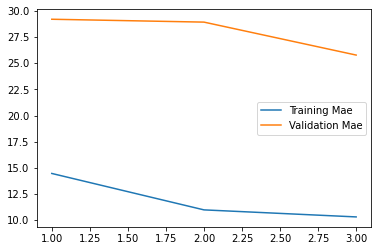

In [20]:
epoch_list = list(range(1, len(hist.history['loss']) + 1))
plt.plot(epoch_list, hist.history['loss'], epoch_list, hist.history['val_loss'])
plt.legend(("Training Mae", "Validation Mae"))
plt.show()